# Tariff recommendation

I have at my disposal data on the behavior of customers who have already switched to new tariffs. You need to build a model for the classification problem that will select the appropriate rate. Data preprocessing is not required - you have already done it.

I have to build a model with the highest possible accuracy. For the project to be considered successful, the percentage of correct answers must be at least 0.75.

## Open and evaluate the file

At this stage, we will prepare the libraries necessary for the work and the dataframe used.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#required libraries loaded

df = pd.read_csv('/datasets/users_behavior.csv')

#and the dataset under researching

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [96]:
df.sample(10)

,calls,minutes,messages,mb_used,is_ultra
948,58.0,386.44,0.0,16581.86,0
1308,39.0,282.31,0.0,19236.80,0
1487,52.0,360.95,17.0,9780.07,1
2151,79.0,530.97,39.0,25208.92,1
2392,69.0,422.80,28.0,25065.10,0
1792,59.0,452.68,44.0,22134.61,0
2892,40.0,300.10,35.0,0.00,1
3064,78.0,553.56,0.0,14544.55,0
1822,115.0,679.27,1.0,28668.40,1
1047,83.0,577.82,8.0,14878.49,0


In [97]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


###### Conclusion

The libraries necessary for the work were loaded, the dataset used was formed, the simplest characteristics of the available data were studied.

## Divide the data into samples

I start dividing the dataframe into training, test and validation samples.

In [98]:
features = df.drop(['is_ultra'], axis = 1)
target = df['is_ultra']

In [99]:
# split using the train_test_split function from the sklearn library
X, X_test, y, y_test = train_test_split(features, target, test_size=0.2, random_state=12345)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12345)

###### Conclusion

As a result, the training sample accounts for 60% of the data and 20% for the training and validation samples.

## Explore models

Decision tree models, random forest and logistic regression will be explored. To do this, a loop is created in which the prediction accuracy will be calculated for different values of hyperparameters, after which it will be compared with previous results and selected if the result is the best.

#### Decision tree

In [100]:
best_params = []
best_accuracy = 0
for max_depth in range(2,10):
    for min_samples_split in range(2,6):
        for min_samples_leaf in range(1,10):
            for criterion in ['gini', 'entropy']:
                model_dt = DecisionTreeClassifier(random_state=12345,
                                                      max_depth=max_depth,
                                                      min_samples_split=min_samples_split,
                                                      min_samples_leaf=min_samples_leaf,
                                                      criterion=criterion)
                model_dt.fit(X_train, y_train)
                predictions = model_dt.predict(X_valid)
                accuracy = accuracy_score(y_valid, predictions)
                if accuracy > best_accuracy:
                    best_params = [max_depth, min_samples_split, min_samples_leaf, criterion]
                    best_accuracy = accuracy

In [101]:
print('''Наибольшая точность: {}
Параметры наилучшей модели:
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(round(best_accuracy, 2),
                             best_params[0],
                             best_params[1],
                             best_params[2],
                             best_params[3]
                            ))

Наибольшая точность: 0.79
Параметры наилучшей модели:
   max_depth = 8
   min_samples_split = 2
   min_samples_leaf = 6
   criterion = entropy 


###### Conclusion

Great, the decision tree model passed the accuracy threshold using hyperparameters with a maximum tree depth of 6 units, a minimum number of samples of 2, and a minimum number of samples of 5. Let's try to improve the result.

#### Random forest

In [102]:
best_params = []
best_accuracy = 0
for n_estimators in (1,10):
    for max_depth in range(2,10):
        for min_samples_split in range(2,10):
            for min_samples_leaf in range(1,8):
                for criterion in ['gini', 'entropy']:
                    model_rf = RandomForestClassifier(random_state=12345,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split,
                                                          min_samples_leaf=min_samples_leaf,
                                                          criterion=criterion)
                    model_rf.fit(X_train, y_train)
                    predictions = model_rf.predict(X_valid)
                    accuracy = accuracy_score(y_valid, predictions)
                    if accuracy > best_accuracy:
                        best_params = [n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion]
                        best_accuracy = accuracy

In [103]:
print('''Наибольшая точность: {}
Параметры наилучшей модели:
   n_estimators = {}
   max_depth = {}
   min_samples_split = {}
   min_samples_leaf = {}
   criterion = {} '''.format(round(best_accuracy, 2),
                             best_params[0],
                             best_params[1],
                             best_params[2],
                             best_params[3],
                             best_params[4]
                            ))

Наибольшая точность: 0.8
Параметры наилучшей модели:
   n_estimators = 10
   max_depth = 9
   min_samples_split = 7
   min_samples_leaf = 1
   criterion = gini 


###### Conclusion

The accuracy result was increased by 0.01 units. Perhaps the result is still possible to improve.

#### Logistic regression

In [104]:
best_params = []
best_accuracy = 0

cs = np.linspace(0.01, 10, 1000, endpoint=True)
for C in cs:
    model_lr = LogisticRegression(random_state=12345,
                                      C=C,
                                      max_iter=1000)
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_valid)
    accuracy = accuracy_score(y_valid, predictions)
    if accuracy > best_accuracy:
        best_params = [C]
        best_accuracy = accuracy

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [105]:
print('''Наибольшая точность: {}
Параметры наилучшей модели:
   C = {} '''.format(round(best_accuracy, 2),
                             best_params[0]
                            ))

Наибольшая точность: 0.73
Параметры наилучшей модели:
   C = 0.14 


###### Conclusion

The result of the accuracy of the logistic regression model does not reach the threshold value. We use a random forest model.

## Check the model on the test set

At this stage, I will check the accuracy of predicting models on a test set.

In [106]:
model_rf = RandomForestClassifier(random_state=12345,
                                      n_estimators=10,
                                      max_depth=9,
                                      min_samples_split=6,
                                      min_samples_leaf=2,
                                      criterion='gini')
model_rf.fit(X, y)
predictions = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Точность модели на тестовой выборке: {}'.format(round(accuracy, 2)))

Точность модели на тестовой выборке: 0.81


###### Conclusion

As you can see, the random forest model copes with the task on the test set by another 0.01 point of accuracy better. It is worth choosing this model.

## Check models for adequacy

I should check to what extent the model I have chosen matches the object being modeled, and how the accuracy of prediction changes when hyperparameters change.

Let's research the dependence of random forest hyperparameters and accuracy.

In [107]:
accuracy_df = pd.DataFrame(columns=['n_estimators', 'max_depth', 'accuracy'])
for n_est in range(2, 31):
    for m_depth in range(2, 11):
        model_rf = RandomForestClassifier(random_state=12345,
                                      n_estimators=n_est,
                                      max_depth=m_depth)
        model_rf.fit(X, y)
        predictions = model_rf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_df = accuracy_df.append({'n_estimators': n_est,
                                          'max_depth': m_depth,
                                          'accuracy': accuracy}, ignore_index=True)

In [108]:
display(accuracy_df.head(10))

,n_estimators,max_depth,accuracy
0,2.0,2.0,0.783826
1,2.0,3.0,0.788491
2,2.0,4.0,0.788491
3,2.0,5.0,0.793157
4,2.0,6.0,0.791602
5,2.0,7.0,0.788491
6,2.0,8.0,0.766719
7,2.0,9.0,0.765163
8,2.0,10.0,0.762053
9,3.0,2.0,0.785381


Let's take a closer look.

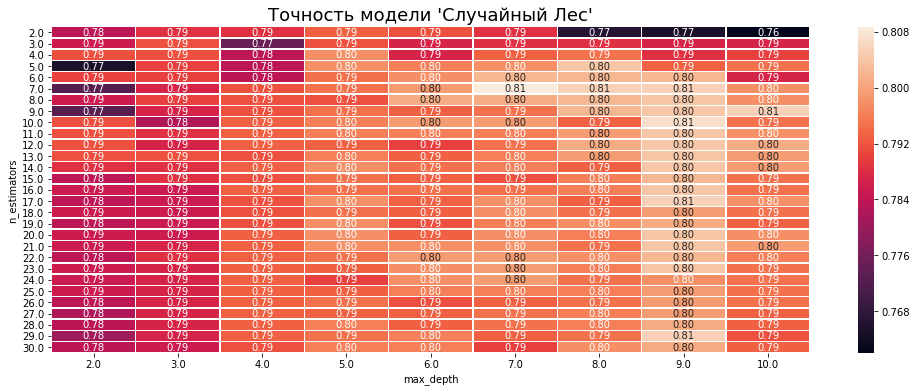

In [109]:
accuracy_pivot = accuracy_df.pivot("n_estimators", "max_depth", "accuracy")
f, ax = plt.subplots(figsize=(17, 6))
sns.heatmap(accuracy_pivot, annot=True, fmt=".2f", linewidths=.5, ax=ax)
ax.set_title("Точность модели 'Случайный Лес'", fontsize=18)
plt.show()

###### Conclusion

The hyperparameter performance can be improved - it is possible to set the depth to 7 and the number of trees to 7 without losing accuracy. (We used n_estimators = 10 and max_depth = 9)

<br>
This will probably speed up the model.

## General conclusion

I trained and tested three different types of models (decision tree, random forest, and logistic regression). I tested them on various hyperparameters, choosing the best ones from them. All models passed the accuracy threshold of 0.75 (accuracy). Additionally, an adequacy test was carried out, during which the values ​​of hyperparameters were identified, at which there will be no loss in accuracy.